In [1]:
import pandas as pd
import numpy as np
import scipy as scp
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Initialize dataframe from excel spreadsheet
oad2 = pd.read_excel("oxy_avail_dataset.xls")
oad2.head()

,OTUId,45A 10,45B 10,45C 10,75A 10,75B 10,75C 10,150A 10,150B 10,150C 10,...,class_confidence,order_,order_confidence,family,family_confidence,genus,genus_confidence,species,species_confidence,sequence
0,OTU_1,24014,12430,477,231,35910,9801,6183,22212,5628,...,1.0,Methylophilales,1.0,Methylophilaceae,1.0,Methylophilus,1.00,NaN,NaN,ATTGAACGCTGGCGGAATGCTTTACACATGCAAGTCGAACGATGAA...
1,OTU_2,20188,24781,13429,22430,22253,24440,684,688,622,...,1.0,Methylococcales,1.0,Methylococcaceae,1.0,Methylobacter,1.00,NaN,NaN,ATTGAACGCTGGCGGTATGCTTAACACATGCAAGTCGAACGGTAGC...
2,OTU_3,2417,5259,29605,790,591,8685,1698,318,105,...,1.0,Methylophilales,1.0,Methylophilaceae,1.0,Methylotenera,1.00,NaN,NaN,ATTGAACGCTGGCGGAATGCTTTACACATGCAAGTCGAACGATGAT...
3,OTU_5,289,363,208,259,366,331,18787,10820,5755,...,1.0,Methylococcales,1.0,Methylococcaceae,1.0,Methylosarcina,1.00,NaN,NaN,ATTGAACGCTGGCGGTATGCTTAACACATGCAAGTCGAACGGTAAC...
4,OTU_4,98,98,5834,856,361,192,72,199,72,...,1.0,Methylophilales,1.0,Methylophilaceae,1.0,Methylotenera,0.95,NaN,NaN,ATTGAACGCTGGCGGAATGCTTTACACATGCAAGTCGAACGGCAGC...


In [3]:
#Move genus column to front
cols = list(oad2)
old = cols.index('phylum')
cols.insert(1, cols.pop(old))

oad2 = oad2.reindex(columns = cols)
oad2.head()

,OTUId,phylum,45A 10,45B 10,45C 10,75A 10,75B 10,75C 10,150A 10,150B 10,...,class_confidence,order_,order_confidence,family,family_confidence,genus,genus_confidence,species,species_confidence,sequence
0,OTU_1,Proteobacteria,24014,12430,477,231,35910,9801,6183,22212,...,1.0,Methylophilales,1.0,Methylophilaceae,1.0,Methylophilus,1.00,NaN,NaN,ATTGAACGCTGGCGGAATGCTTTACACATGCAAGTCGAACGATGAA...
1,OTU_2,Proteobacteria,20188,24781,13429,22430,22253,24440,684,688,...,1.0,Methylococcales,1.0,Methylococcaceae,1.0,Methylobacter,1.00,NaN,NaN,ATTGAACGCTGGCGGTATGCTTAACACATGCAAGTCGAACGGTAGC...
2,OTU_3,Proteobacteria,2417,5259,29605,790,591,8685,1698,318,...,1.0,Methylophilales,1.0,Methylophilaceae,1.0,Methylotenera,1.00,NaN,NaN,ATTGAACGCTGGCGGAATGCTTTACACATGCAAGTCGAACGATGAT...
3,OTU_5,Proteobacteria,289,363,208,259,366,331,18787,10820,...,1.0,Methylococcales,1.0,Methylococcaceae,1.0,Methylosarcina,1.00,NaN,NaN,ATTGAACGCTGGCGGTATGCTTAACACATGCAAGTCGAACGGTAAC...
4,OTU_4,Proteobacteria,98,98,5834,856,361,192,72,199,...,1.0,Methylophilales,1.0,Methylophilaceae,1.0,Methylotenera,0.95,NaN,NaN,ATTGAACGCTGGCGGAATGCTTTACACATGCAAGTCGAACGGCAGC...


In [4]:
#Drop rows that describe the index and set the index
oad2_cleaned = oad2.loc[:, :'225C 16'].set_index('OTUId')
oad2_cleaned.head()

,phylum,45A 10,45B 10,45C 10,75A 10,75B 10,75C 10,150A 10,150B 10,150C 10,...,75C 16,150A 16,150B 16,150C 16,15A 16,15B 16,15C 16,225A 16,225B 16,225C 16
OTUId,,,,,,,,,,,,,,,,,,,,,
OTU_1,Proteobacteria,24014,12430,477,231,35910,9801,6183,22212,5628,...,5380,4219,7319,16424,187,198,407,10191,10663,3043
OTU_2,Proteobacteria,20188,24781,13429,22430,22253,24440,684,688,622,...,5242,380,462,1213,5432,6266,8964,1274,660,212
OTU_3,Proteobacteria,2417,5259,29605,790,591,8685,1698,318,105,...,9096,1619,396,545,5873,3991,423,689,326,70
OTU_5,Proteobacteria,289,363,208,259,366,331,18787,10820,5755,...,90,2536,1912,74,67,83,88,2604,4620,2865
OTU_4,Proteobacteria,98,98,5834,856,361,192,72,199,72,...,254,34,119,103,1671,4136,2690,47,0,9


In [5]:
#Segregate into dataframes by specified taxonomical rank
oad_rank = {k:v for k,v in oad2_cleaned.groupby('phylum')}
oad_rank

{'Acidobacteria':                 phylum  45A 10  45B 10  45C 10  75A 10  75B 10  75C 10  \
 OTUId                                                                    
 OTU_54   Acidobacteria       0       0       0       0       0       0   
 OTU_46   Acidobacteria       0       0       0       0       0       0   
 OTU_80   Acidobacteria       0       0       0       0       0       0   
 OTU_167  Acidobacteria       0       0       0       0       0       0   
 OTU_62   Acidobacteria       0       0       0       0       0       0   
 OTU_74   Acidobacteria       0       0       0       0       0       0   
 OTU_82   Acidobacteria       0       0       0       0       0       0   
 OTU_84   Acidobacteria       0       0       0       0       0       0   
 OTU_85   Acidobacteria       0       0       0       0       0       0   
 OTU_92   Acidobacteria       0       0       0       0       0       0   
 OTU_114  Acidobacteria       0       0       0       0       0       0   
 OTU_118

In [6]:
#List of unique headers
index_list = oad2_cleaned['phylum'].unique()
index_list

array(['Proteobacteria', 'Bacteroidetes', 'Verrucomicrobia',
       'Cyanobacteria/Chloroplast', 'Acidobacteria', 'Nitrospira',
       'Chlamydiae', 'Chlorobi', 'Actinobacteria', 'WS3', 'Firmicutes',
       'Spirochaetes', 'Planctomycetes', 'TM7', 'OD1'], dtype=object)

In [7]:
#Drop specified order column
#for i in oad2_cleaned['phylum'].unique():
for i in index_list:
    oad_rank[str(i)].drop(columns=['phylum'], inplace=True)
    
oad_rank

{'Acidobacteria':          45A 10  45B 10  45C 10  75A 10  75B 10  75C 10  150A 10  150B 10  \
 OTUId                                                                       
 OTU_54        0       0       0       0       0       0        0        0   
 OTU_46        0       0       0       0       0       0        0        0   
 OTU_80        0       0       0       0       0       0        0        0   
 OTU_167       0       0       0       0       0       0        0        0   
 OTU_62        0       0       0       0       0       0        0        0   
 OTU_74        0       0       0       0       0       0        0        0   
 OTU_82        0       0       0       0       0       0        0        0   
 OTU_84        0       0       0       0       0       0        0        0   
 OTU_85        0       0       0       0       0       0        0        0   
 OTU_92        0       0       0       0       0       0        0        0   
 OTU_114       0       0       0       0       

In [8]:
#Initialize storage list
scree_list_group = []
storage_list = []

#PCA for each group in a for loop
for i in index_list:
    #Center and scale data
    oadg_scaledforpca = preprocessing.scale(oad_rank[i].T)

    #Make PCA object
    pcag = PCA()

    #Fit and scale PCA data
    pcag.fit(oadg_scaledforpca)
    pcag_data = pcag.transform(oadg_scaledforpca)

    #Generate values for scree plot (variance explained) and save to csv file
    var_exp_group = np.round(pcag.explained_variance_ratio_*100, decimals=2)
    var_exp_group.tofile('Explained_Variance_of_Groups.csv')

    #Create scree list and append
    scree_list_group.append(var_exp_group)

    #Label columns
    col_labels_group = ['PC' + str(x) for x in range(1, len(var_exp_group) + 1)]

    #Generate new dataframe of PCA principal components and save to csv file
    pca_df_group = pd.DataFrame(pcag_data, columns = col_labels_group)
    pca_df_group.to_csv('PCA_of_Grouped_Data_by_Phylum_'+str(i).replace("/", "_")+'.csv')
    #print(pca_df_group.head())
    
    #Save to storage list
    storage_list.append(pca_df_group)


C:\Users\Meenakshi Krishnan\Miniconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  
C:\Users\Meenakshi Krishnan\Miniconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  
C:\Users\Meenakshi Krishnan\Miniconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  
C:\Users\Meenakshi Krishnan\Miniconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  
C:\Users\Meenakshi Krishnan\Miniconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  
C:\Users\Meenakshi Krishnan\Miniconda3\lib\site-package

In [10]:
# Convert Scree Data from a np.array to a DF and save into csv file 
scree_group = np.array(scree_list_group)
scree_group = pd.DataFrame(scree_list_group, index=index_list, columns = None)
scree_group

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
Proteobacteria,11.60,8.80,7.37,7.03,6.36,5.67,5.33,4.63,4.38,4.12,...,1.71,1.16,1.04,0.84,0.69,0.49,0.32,0.26,0.07,0.0
Bacteroidetes,11.03,9.30,8.16,7.31,7.11,6.23,5.75,5.46,4.90,4.46,...,1.00,0.90,0.55,0.47,0.43,0.24,0.22,0.18,0.03,0.0
Verrucomicrobia,29.17,25.15,20.06,13.37,7.91,4.34,0.00,0.00,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cyanobacteria/Chloroplast,100.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Acidobacteria,29.26,25.69,13.82,11.24,9.71,6.21,3.75,0.32,0.00,0.00,...,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Nitrospira,100.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Chlamydiae,100.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Chlorobi,100.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Actinobacteria,51.72,48.28,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WS3,100.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


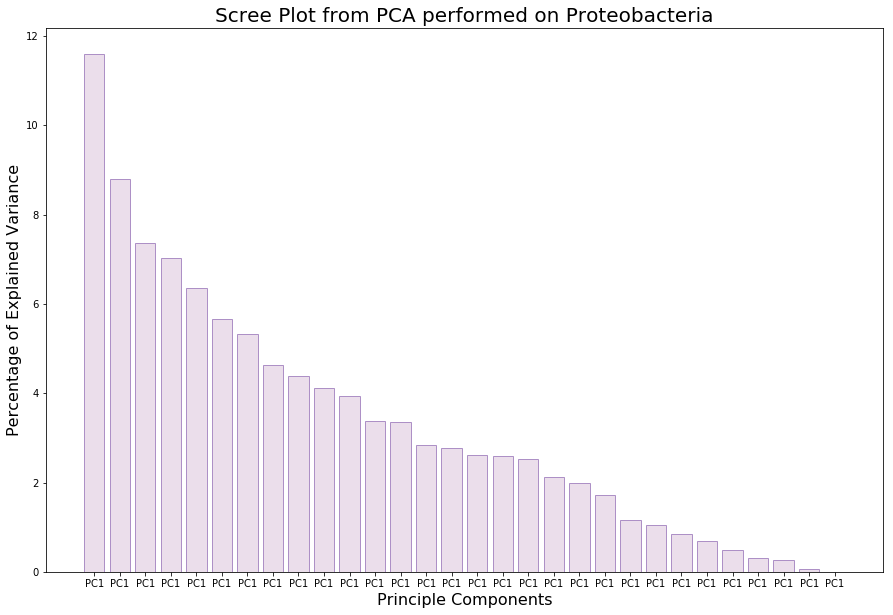

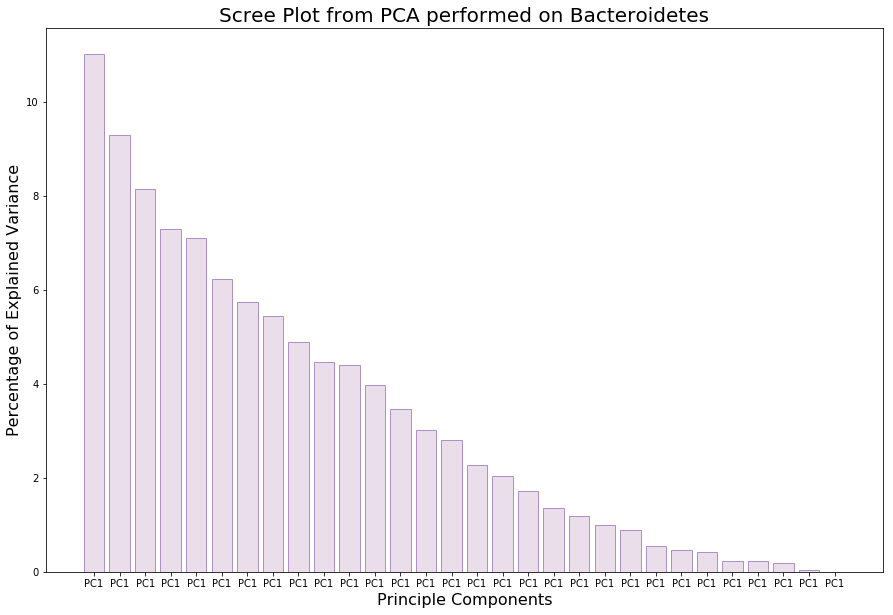

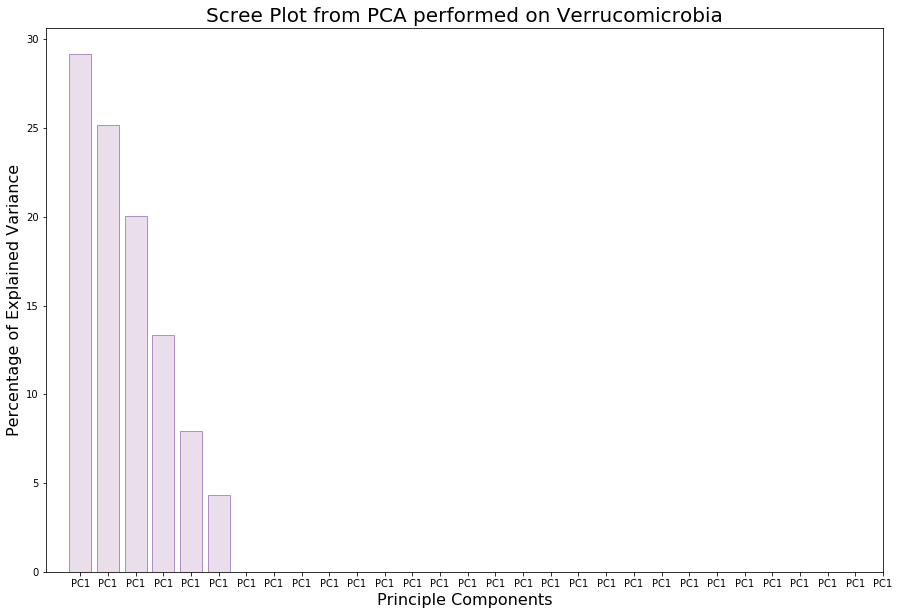

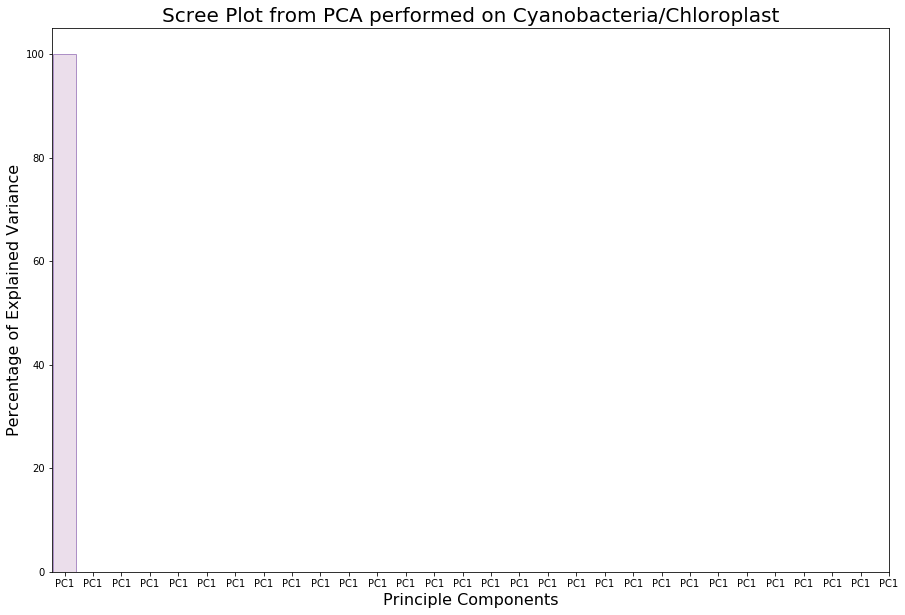

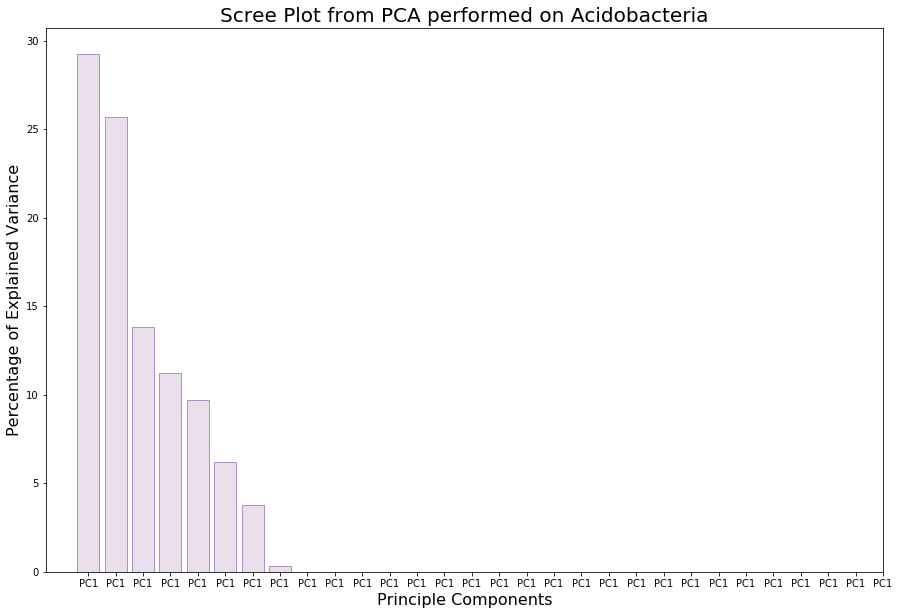

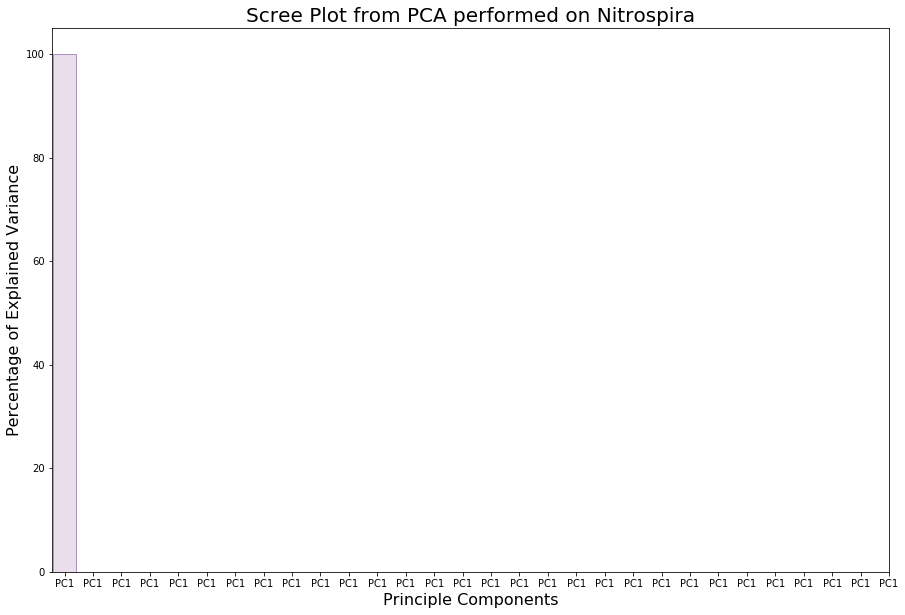

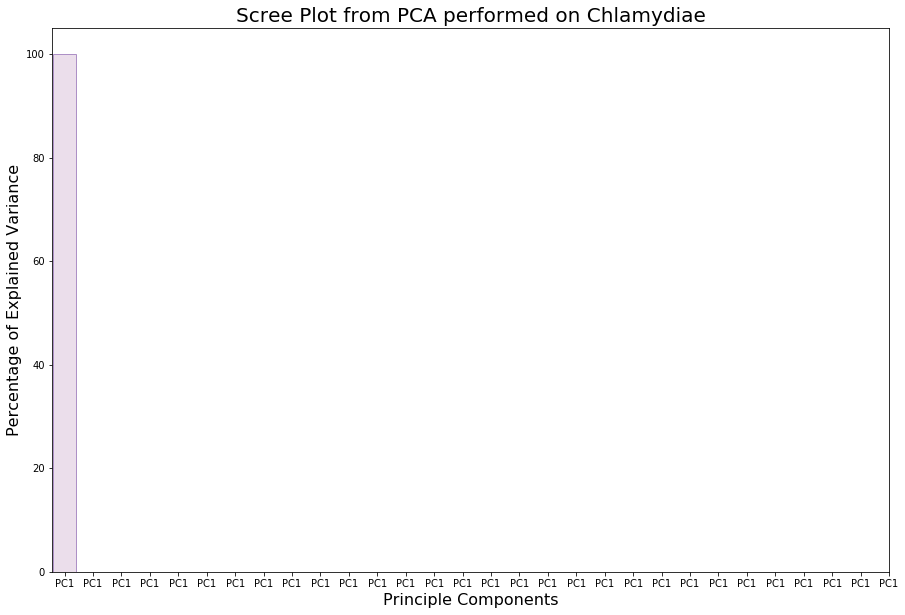

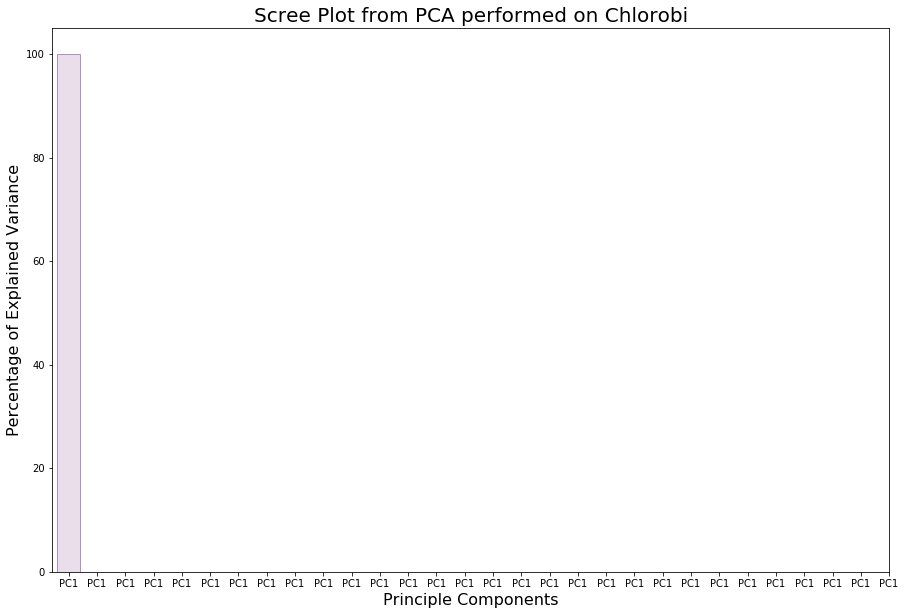

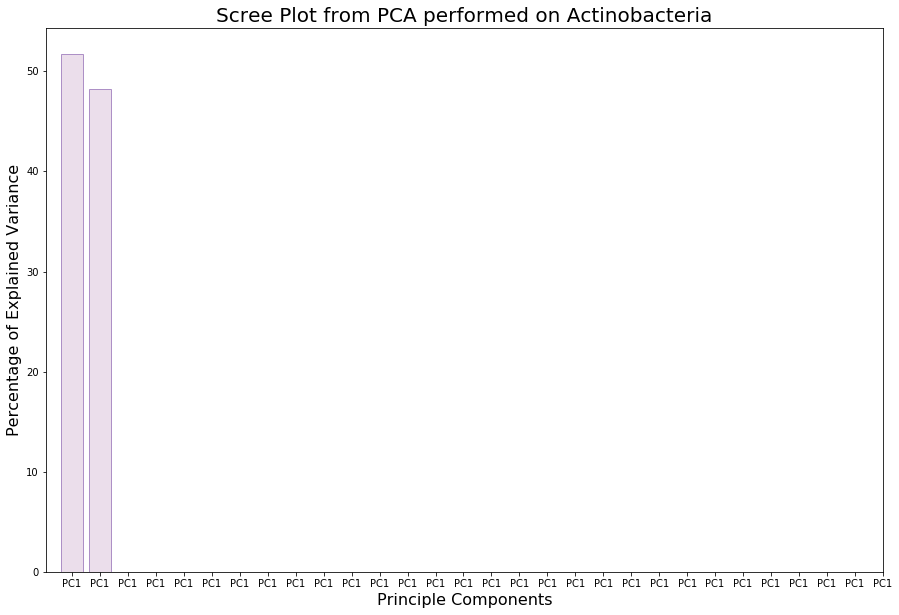

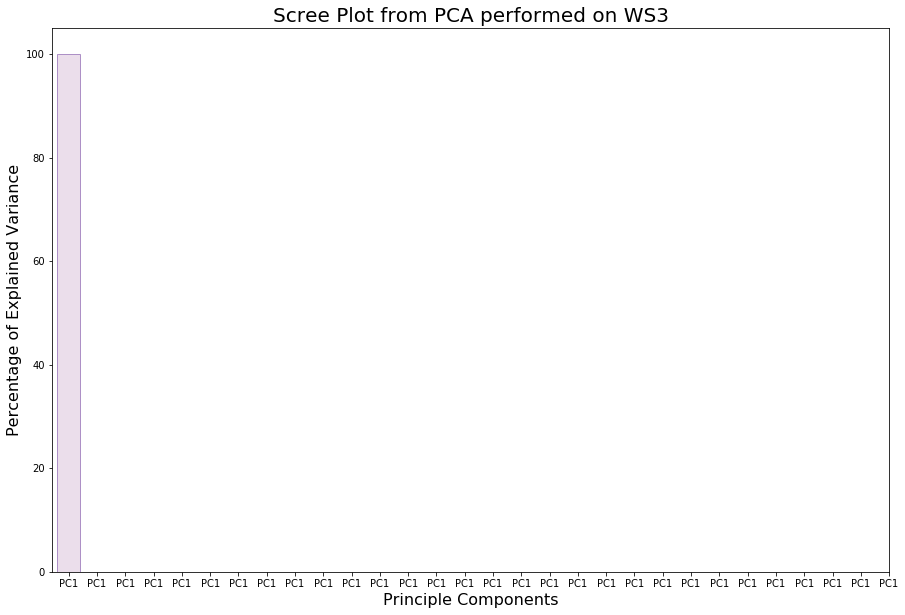

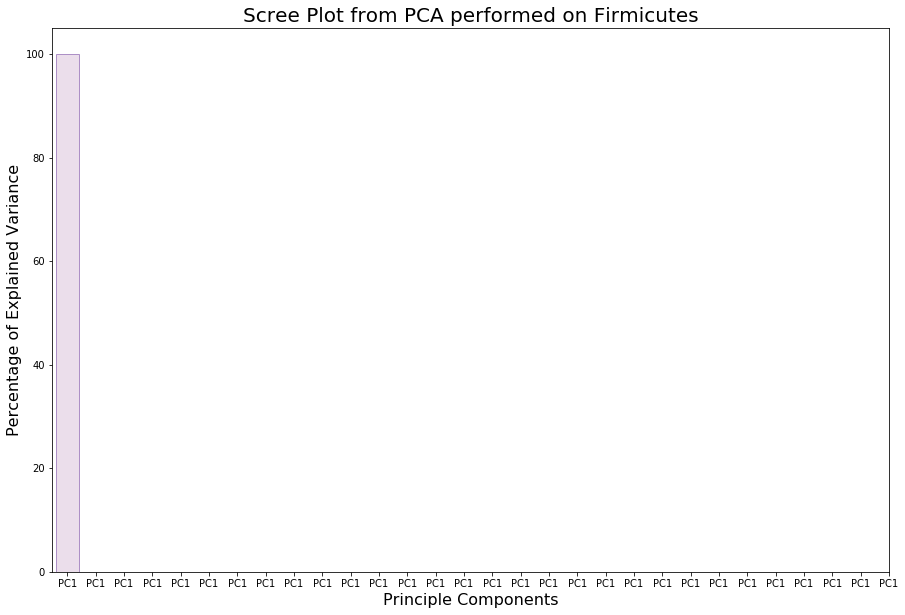

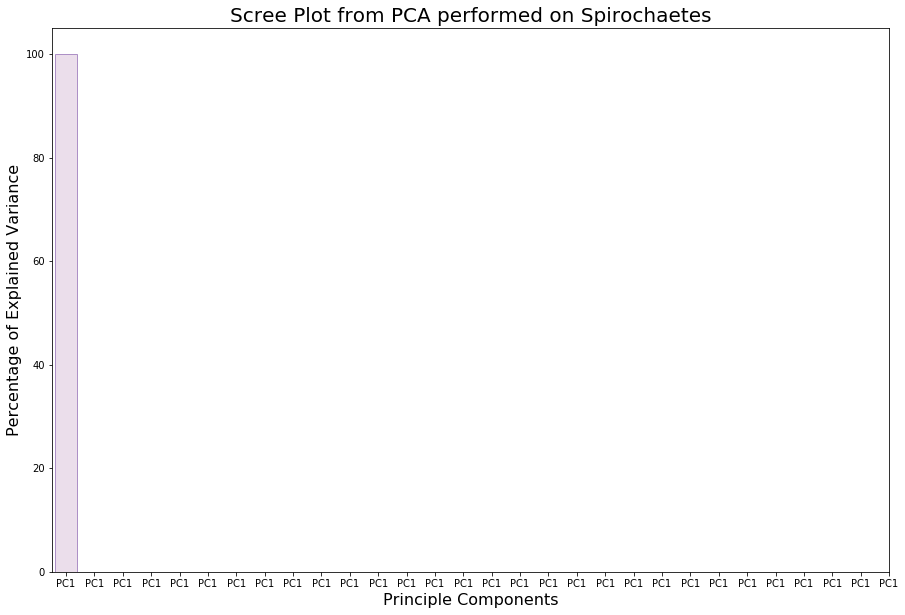

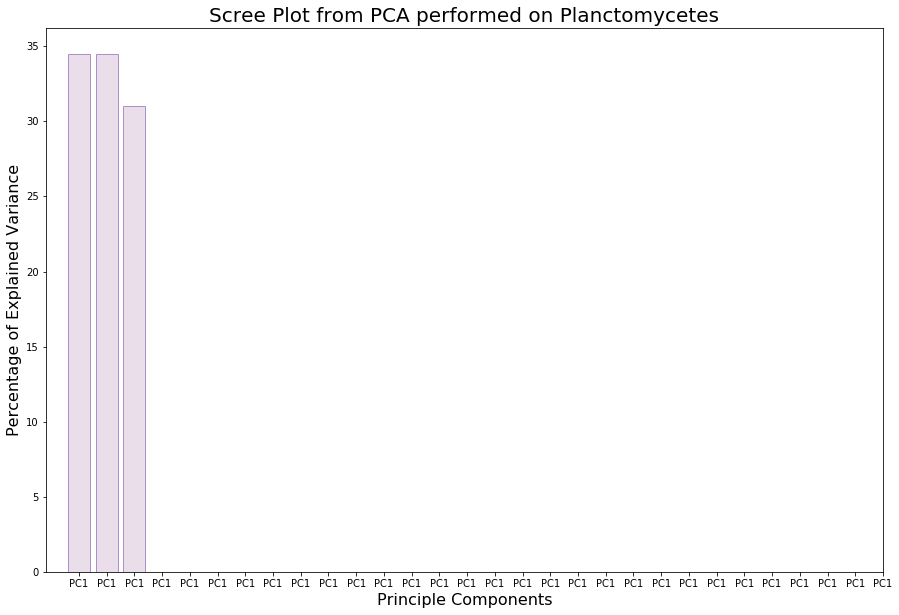

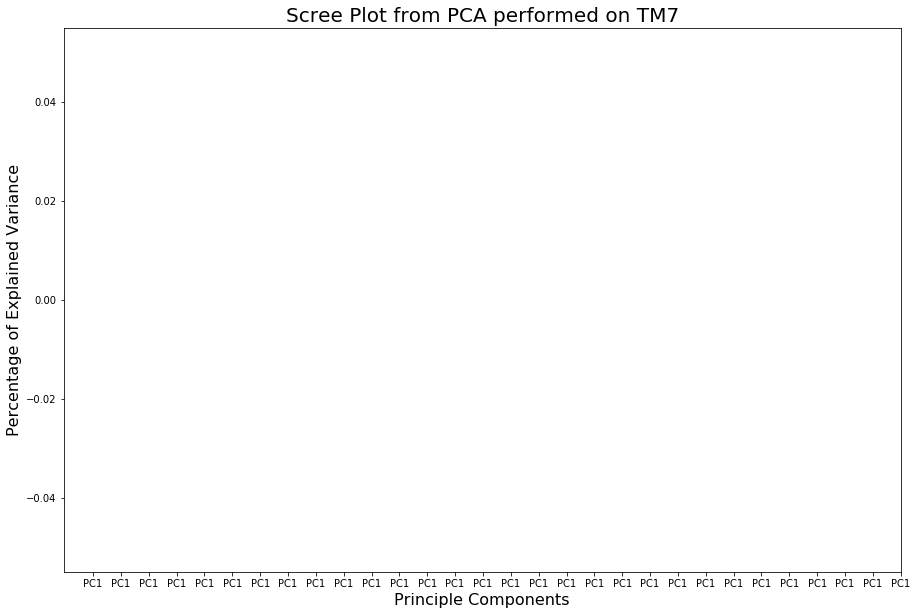

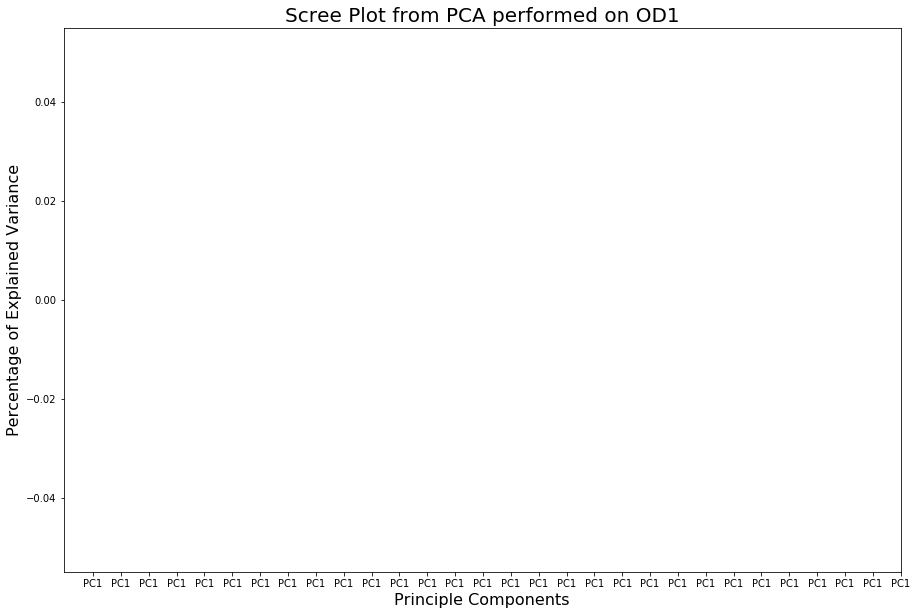

In [11]:
#Make Scree Plot of data
for i in range(len(index_list)):
    #Initialize figure
    fig2 = plt.figure(figsize=(15,10))
    
    #Plot histogram
    plt.bar(x = range(1, len(scree_group.iloc[i]) + 1), height = scree_group.iloc[i], tick_label = col_labels_group, color = 'thistle', edgecolor = 'rebeccapurple', alpha=0.5)

    #Titles and lables
    plt.ylabel('Percentage of Explained Variance', fontsize=16)
    plt.xlabel('Principle Components', fontsize=16)
    plt.title("Scree Plot from PCA performed on "+ str(index_list[i]), fontsize=20)

    plt.show()